In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
x_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,))

In [6]:
#preprocessing
x_train=x_train/255.0
y_train=tf.keras.utils.to_categorical(y_train)

In [7]:
y_train.shape

(60000, 10)

In [12]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((28,28),name="InputLayer"))
model.add(tf.keras.layers.Flatten(name="Flatten"))
model.add(tf.keras.layers.Dense(512,activation=tf.keras.activations.relu,name="Dense"))
model.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu,name="Dense2"))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax,name="output"))

In [13]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['acc'])

In [15]:
model.fit(x=x_train,y=y_train,epochs=10,validation_split=0.1,batch_size=64)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - acc: 0.6576 - loss: 1.1434 - val_acc: 0.8065 - val_loss: 0.5783
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - acc: 0.8153 - loss: 0.5535 - val_acc: 0.8285 - val_loss: 0.4905
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.8374 - loss: 0.4787 - val_acc: 0.8367 - val_loss: 0.4800
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8432 - loss: 0.4487 - val_acc: 0.8457 - val_loss: 0.4298
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.8515 - loss: 0.4260 - val_acc: 0.8490 - val_loss: 0.4202
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.8579 - loss: 0.4140 - val_acc: 0.8495 - val_loss: 0.4172
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8604 - loss: 0.4031 - val_acc: 0.8563 - val_loss: 0.4155
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.8621 - loss: 0.3985 - val_acc: 0.8568 - val_loss: 0.3969
Epoch 9/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step -

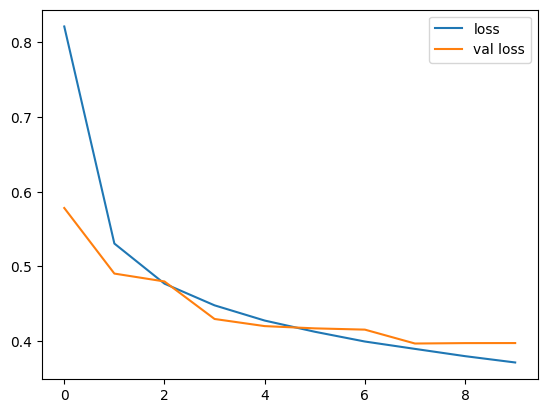

In [16]:
plt.plot(model.history.history['loss'],label="loss")
plt.plot(model.history.history['val_loss'],label="val loss")
plt.legend()

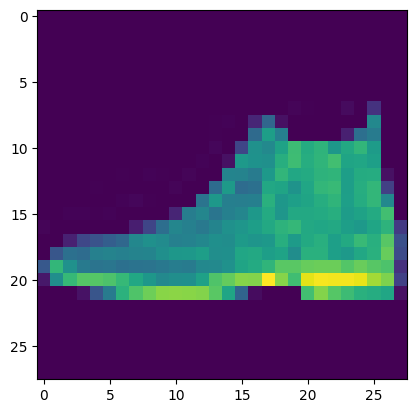

In [28]:
test_image=x_test[0]
plt.imshow(x_test[0])


In [27]:
del test_image

In [29]:
test_image=test_image/255.0

In [30]:
test_image.shape

(28, 28)

In [31]:
model.input_shape

(None, 28, 28)

In [32]:
test_image=np.expand_dims(test_image,axis=0)# at zeroth index

In [33]:
test_image.shape

(1, 28, 28)

In [23]:
import cv2

In [37]:
result=model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [38]:
np.argmax(result)

9

In [56]:
def predict_func(image):
  image=image/255.0
  image=np.expand_dims(image,axis=0)
  result=model.predict(image)
  return np.argmax(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Text(0.5, 1.0, 'actual label is : 9 & predicted is : 9')

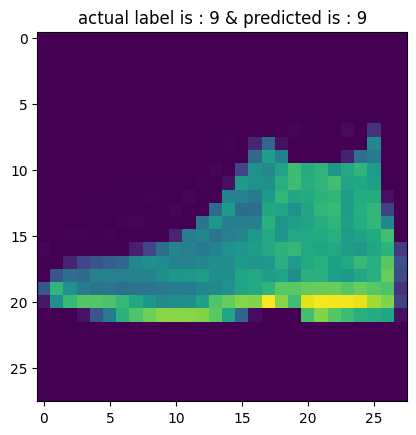

In [57]:
plt.imshow(x_test[0])
result=predict_func(x_test[0])
plt.title(f"actual label is : {y_test[0]} & predicted is : {result}")


In [58]:
x_test_v2=x_test/255.0

In [59]:
x_test_v2.shape


(10000, 28, 28)

In [60]:
result=model.predict(x_test_v2,batch_size=32)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[6.7334367e-05, 3.2702025e-07, 3.9687060e-05, ..., 2.5564998e-01,
        2.7524661e-03, 6.7624348e-01],
       [2.2144568e-04, 1.1657354e-06, 9.3894506e-01, ..., 8.3267726e-11,
        3.0274774e-05, 2.6974538e-09],
       [2.9641897e-05, 9.9993151e-01, 2.6787152e-06, ..., 2.0715047e-08,
        2.3350826e-06, 2.4007493e-10],
       ...,
       [2.7235195e-02, 8.4620224e-06, 1.1059290e-03, ..., 9.1940764e-04,
        9.4055670e-01, 1.4120416e-05],
       [4.4154815e-05, 9.9909019e-01, 2.2444128e-05, ..., 2.6742990e-07,
        8.1216185e-06, 2.6425275e-07],
       [5.3792406e-04, 9.3600647e-05, 5.2961562e-04, ..., 1.3816993e-01,
        2.0558767e-02, 9.3196444e-03]], dtype=float32)

In [61]:
result.shape

(10000, 10)

In [62]:
model.output_shape

(None, 10)

In [67]:
ypred=np.argmax(result,axis=1)

In [68]:
ypred.shape

(10000,)

In [69]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [71]:
(ypred==y_test).mean()

0.8513

In [72]:
scores=pd.DataFrame()

In [73]:
scores["y_predicted"]=ypred
scores["ytest"]=y_test
scores.head()

,y_predicted,ytest
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [75]:
from sklearn.metrics import *

In [76]:
accuracy_score(ypred,y_test)

0.8513

In [80]:
cm=confusion_matrix(ypred,y_test)

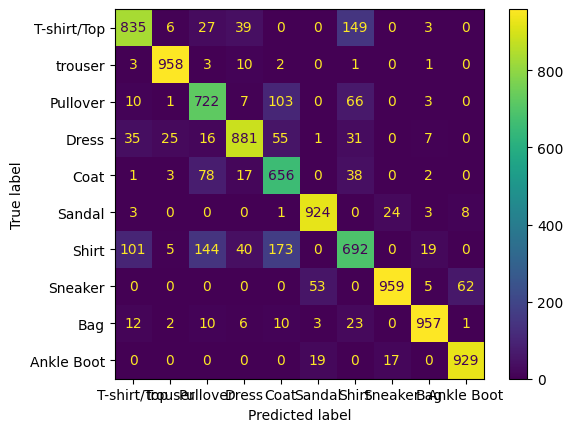

In [87]:

ConfusionMatrixDisplay(cm,display_labels=class_dict.values()).plot()

In [82]:
class_dict={
     0:"T-shirt/Top",
    1:"trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}




In [83]:
class_dict

{0: 'T-shirt/Top',
 1: 'trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

In [88]:
scores.loc[scores['y_predicted']!=scores['ytest']]

,y_predicted,ytest
12,5,7
17,2,4
20,0,2
21,7,5
23,7,9
...,...,...
9972,0,2
9977,0,6
9979,0,6
9985,1,2


In [90]:
scores.loc[12,"ytest"]

7

Text(0.5, 1.0, 'Actual:Sneaker & Predicted : Sandal')

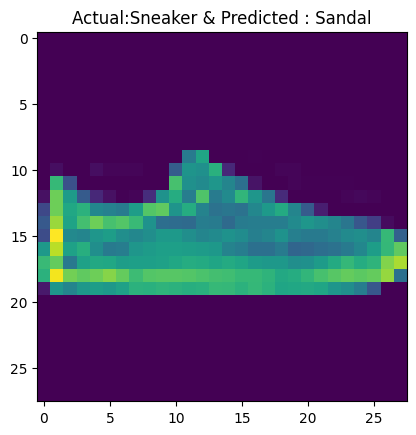

In [97]:
num=12
plt.imshow(x_test[12])
plt.title(f"Actual:{class_dict[scores.loc[num,'ytest']]} & Predicted : {class_dict[scores.loc[num,'y_predicted']]}")

In [99]:
scores.loc[(scores['y_predicted']!=scores['ytest']) & (scores['ytest']==7)]

,y_predicted,ytest
12,5,7
671,5,7
800,9,7
1567,5,7
1816,9,7
2022,9,7
2700,5,7
2772,5,7
2883,5,7
2914,9,7


In [104]:
print(classification_report(y_test,ypred,target_names=list(class_dict.values())))

              precision    recall  f1-score   support

 T-shirt/Top       0.79      0.83      0.81      1000
     trouser       0.98      0.96      0.97      1000
    Pullover       0.79      0.72      0.76      1000
       Dress       0.84      0.88      0.86      1000
        Coat       0.83      0.66      0.73      1000
      Sandal       0.96      0.92      0.94      1000
       Shirt       0.59      0.69      0.64      1000
     Sneaker       0.89      0.96      0.92      1000
         Bag       0.93      0.96      0.95      1000
  Ankle Boot       0.96      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

